In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import math

In [ ]:
nOfPoints = 500
feraction = 0 #it should be between 0 and 1
codes = [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)]
path = Path(vertices, codes)
areaOfCircles = 20

In [ ]:
def change_color(xCoordinates, yCoordinates, feraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < feraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [ ]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(xCoordinates, yCoordinates, feraction)
    df = pd.DataFrame({"x":xCoordinates, "y":yCoordinates, "color":colors}, columns=["x","y","color"])
    return df

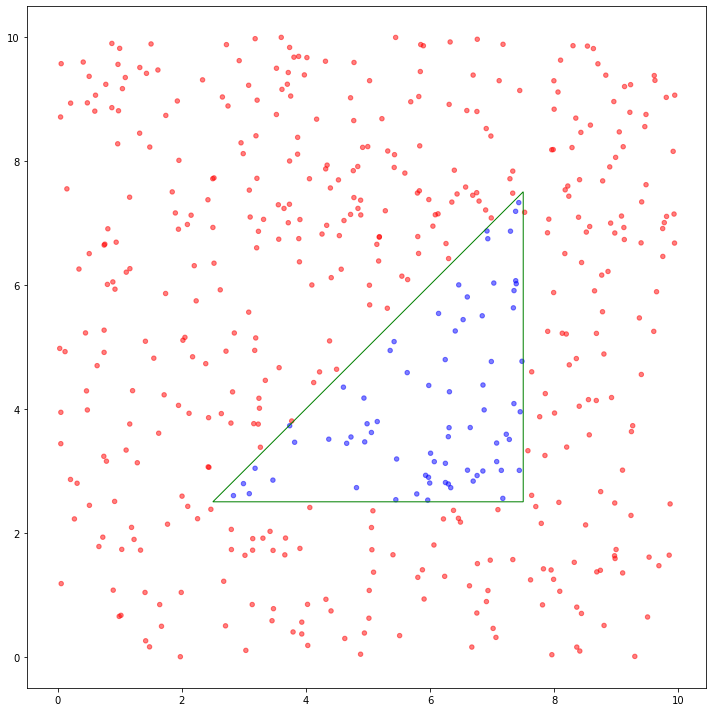

In [ ]:
df = generate_points(nOfPoints)
fig, axs = plt.subplots(1, 1,figsize=(10, 10),tight_layout=True)
pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
axs.add_patch(pathpatch)
plt.scatter(df["x"], df["y"], s=areaOfCircles, c=df["color"], alpha=0.5)
axs.autoscale_view()
plt.show()

In [ ]:
def find_KNN(df, point, k):
    df['dist'] = np.sqrt((df['x'].to_numpy() - point['x'])**2 + (df['y'].to_numpy() - point['y'])**2)
    df.sort_values('dist', ignore_index=True, inplace=True)
    return df[:k]

In [ ]:
point = pd.DataFrame([[6,6]],columns=['x','y'])
print(find_KNN(df,point.iloc[0],4)['color'].mode()[0])

red


In [ ]:
testPoints = generate_points(10000)
nOfTrueColors = 0
for index, row in testPoints.iterrows():
    knnColor = find_KNN(df, row, 5)['color'].mode()[0]
    if knnColor == row['color']:
        nOfTrueColors += 1  
print(nOfTrueColors/10000)

0.9781


In [ ]:
def test_triangle(triangles,repeats):
  outcome = [] #array of tuples containing (average,standard deviation)
  global path
  global codes
  for triangle in triangles:
    path = Path(triangle,codes)
    repeatOutcomes = []
    for r in range(repeats):  #repeat the experiment repeats # of times
      S = generate_points(nOfPoints)
      testPoints = generate_points(10000)
      misclass = 0
      for index, row in testPoints.iterrows():  #count the misclassifications 
        knnColor = find_KNN(S, row, 5)['color'].mode()[0]
        if knnColor != row['color']:
          misclass += 1
      repeatOutcomes.append(misclass)
    outcome.append((np.average(repeatOutcomes),np.std(repeatOutcomes)))
  return outcome

In [ ]:
triangles = [[(1,1),(9,9),(9,1),(0,0)],
             [(1.5,1.5),(8.5,8.5),(8.5,1.5),(0,0)],
             [(2,2),(8,8),(8,2),(0,0)],
             [(2.5,2.5),(7.5,7.5),(7.5,2.5),(0,0)],
             [(3,3),(7,7),(7,3),(0,0)],
             [(3.5,3.5),(6.5,6.5),(6.5,3.5),(0,0)],
             [(4,4),(6,6),(6,4),(0,0)]
             ]
triangle_outcome = test_triangle(triangles,20)
print(triangle_outcome)

[(401.3, 51.64213396055588), (381.75, 47.74293141398002), (321.35, 41.12939946072638), (273.0, 35.16390194503448), (212.35, 33.19228072910929), (153.4, 37.87268144718564), (105.85, 30.74455236297969)]


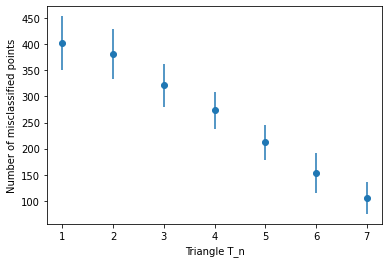

In [ ]:
triangles_x = np.array(range(1,len(triangles)+1))
plt.errorbar(triangles_x,[y[0] for y in triangle_outcome],[yerr[1] for yerr in triangle_outcome], linestyle='None',marker='o')
plt.xlabel("Triangle T_n")
plt.ylabel("Number of misclassified points")
plt.show()



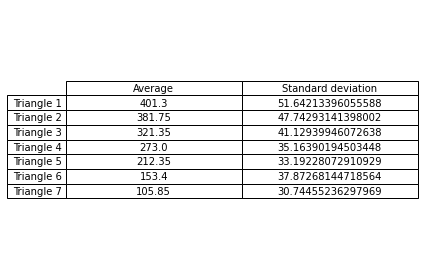

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(triangle_outcome,rowLabels=["Triangle " + str(t) for t in triangles_x],colLabels=["Average", "Standard deviation"],loc='center',cellLoc='center')
fig.tight_layout()
plt.show()